In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
plt.style.use('ggplot')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df=pd.read_csv('/content/Reviews.csv',quoting=3, error_bad_lines=False)

b'Skipping line 4: expected 10 fields, saw 14\nSkipping line 6: expected 10 fields, saw 11\nSkipping line 7: expected 10 fields, saw 18\nSkipping line 8: expected 10 fields, saw 12\nSkipping line 9: expected 10 fields, saw 11\nSkipping line 12: expected 10 fields, saw 17\nSkipping line 13: expected 10 fields, saw 12\nSkipping line 14: expected 10 fields, saw 11\nSkipping line 17: expected 10 fields, saw 11\nSkipping line 20: expected 10 fields, saw 21\nSkipping line 22: expected 10 fields, saw 11\nSkipping line 23: expected 10 fields, saw 14\nSkipping line 26: expected 10 fields, saw 13\nSkipping line 27: expected 10 fields, saw 12\nSkipping line 28: expected 10 fields, saw 11\nSkipping line 30: expected 10 fields, saw 12\nSkipping line 31: expected 10 fields, saw 17\nSkipping line 32: expected 10 fields, saw 12\nSkipping line 33: expected 10 fields, saw 11\nSkipping line 34: expected 10 fields, saw 19\nSkipping line 35: expected 10 fields, saw 12\nSkipping line 36: expected 10 fields,

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [ ]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [ ]:
df.shape

(3414, 10)

In [ ]:
df=df.head(2000)
df.shape

(2000, 10)

In [ ]:
df['Score'].value_counts().sort_index()

1     177
2      73
3     115
4     231
5    1404
Name: Score, dtype: int64

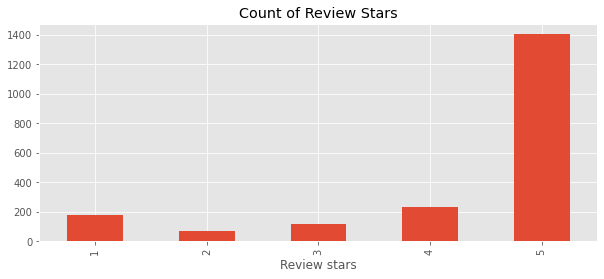

In [ ]:
ax=df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Review Stars', figsize=(10,4))
ax.set_xlabel('Review stars')
plt.show()

In [ ]:
example=df['Text'][82]
print(example)

"So many ""healthy"" products don't taste very good.  Or taste good when you first try them and then go downhill.  I've had these chips on more than one occasion and they are very tasty.  I've served them to guests twice and both times they wanted to know what they were and where to get them. It's also nice to have something gluten-free for friends who are borderline diabetic...but I would eat them anyway."


In [ ]:
tokens=nltk.word_tokenize(example)

In [20]:
nltk.download('averaged_perceptron_tagger')
tagged=nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('``', '``'),
 ('So', 'RB'),
 ('many', 'JJ'),
 ('``', '``'),
 ("''", "''"),
 ('healthy', 'JJ'),
 ("''", "''"),
 ("''", "''"),
 ('products', 'NNS'),
 ('do', 'VBP')]

In [25]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  ``/``
  So/RB
  many/JJ
  ``/``
  ''/''
  healthy/JJ
  ''/''
  ''/''
  products/NNS
  do/VBP
  n't/RB
  taste/VB
  very/RB
  good/JJ
  ./.
  Or/CC
  taste/NN
  good/JJ
  when/WRB
  you/PRP
  first/RB
  try/VB
  them/PRP
  and/CC
  then/RB
  go/VB
  downhill/NN
  ./.
  I/PRP
  've/VBP
  had/VBN
  these/DT
  chips/NNS
  on/IN
  more/JJR
  than/IN
  one/CD
  occasion/NN
  and/CC
  they/PRP
  are/VBP
  very/RB
  tasty/JJ
  ./.
  I/PRP
  've/VBP
  served/VBN
  them/PRP
  to/TO
  guests/VB
  twice/RB
  and/CC
  both/DT
  times/NNS
  they/PRP
  wanted/VBD
  to/TO
  know/VB
  what/WP
  they/PRP
  were/VBD
  and/CC
  where/WRB
  to/TO
  get/VB
  them/PRP
  ./.
  It/PRP
  's/VBZ
  also/RB
  nice/JJ
  to/TO
  have/VB
  something/NN
  gluten-free/JJ
  for/IN
  friends/NNS
  who/WP
  are/VBP
  borderline/JJ
  diabetic/JJ
  .../:
  but/CC
  I/PRP
  would/MD
  eat/VB
  them/PRP
  anyway/RB
  ./.
  ''/'')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


#VADER Sentiment Analysis

In [26]:
#bag of words approach

In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [30]:
nltk.download('vader_lexicon')
sia= SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [34]:
sia.polarity_scores('jUST BAD, CANNOT SAY ANYTHING MORE. BAD.')

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.8579}

In [36]:
 #running polarity score on the entire dataset
 res={}
 for i,row in tqdm(df.iterrows(),total=len(df)):
   text=row['Text']
   myid=row['Id']
   res[myid]=sia.polarity_scores(text)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [39]:
vaders=pd.DataFrame(res).T
print(vaders)

        neg    neu    pos  compound
1     0.000  0.695  0.305    0.9441
2     0.138  0.862  0.000   -0.5664
4     0.000  1.000  0.000    0.0000
9     0.000  0.851  0.149    0.6369
10    0.000  0.705  0.295    0.8313
...     ...    ...    ...       ...
7334  0.092  0.585  0.322    0.9112
7336  0.000  0.584  0.416    0.9493
7339  0.000  0.830  0.170    0.8555
7340  0.000  0.682  0.318    0.8687
7341  0.000  0.770  0.230    0.9196

[2000 rows x 4 columns]


In [40]:
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df, how='left')

In [41]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,0.000,0.851,0.149,0.6369,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,0.000,0.705,0.295,0.8313,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7334,0.092,0.585,0.322,0.9112,B003DIIZ9O,A10ZXUNZNUJY0Z,"""SNRNAZ """"Kindling Queen""""""",1,1,5,1319587200,Cesar treats,"""My Westie - like the picture on the package -..."
1996,7336,0.000,0.584,0.416,0.9493,B003DIIZ9O,A3DEFR93OZMN3B,Marjory A. Lowrie,0,0,5,1345334400,Dog Treats,My dogs love the Cesar's softies. Get best pr...
1997,7339,0.000,0.830,0.170,0.8555,B000FAM3Z0,AR32T3627EWQ0,Jesse JJ,0,0,5,1339977600,Natures Logic Venisen,This is The best dog food their is because eve...
1998,7340,0.000,0.682,0.318,0.8687,B000FAM3Z0,AIRP51AZRDH9J,"""Marilyn Purdy """"nutritionist w/a mission""""""",0,0,5,1200096000,Best Dog Food Ever!,I've used Natures Logic Dog Food for about a y...


In [42]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,0.000,0.851,0.149,0.6369,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,0.000,0.705,0.295,0.8313,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


#Plotting vader results

Text(0.5, 1.0, 'Compound Score v/s Amazon Star Review')

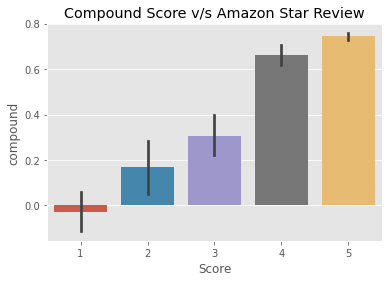

In [45]:
ax=sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score v/s Amazon Star Review')

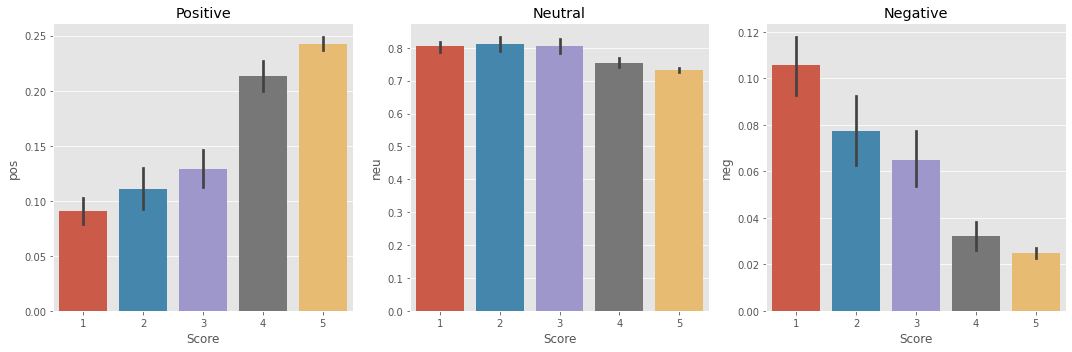

In [49]:
fig,axs=plt.subplots(1,3,figsize=(15,5))

sns.barplot(data=vaders, x='Score', y='pos',ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu',ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()

#ROBERTA Pretrained Model Method

In [54]:
pip install git+https://github.com/huggingface/transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-v8t0xise
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-v8t0xise
  Resolved https://github.com/huggingface/transformers to commit c8f35a9ce37bd03f37fcf8336172bdcbe7ffc86a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 22.1 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.26.0.dev0-py3-none-any.whl size=6124680 sha256=dd2580d2093f8afb7d9347b2a516b33f50c1134bad95f1a2c0ab98756b179f16
  Stored in directory: /tmp/pip-ephem-wheel-cache-tqrepmf_/wheels/42/68/45/c63edff61c292f2dfd4df4ef6522dcbecc603e7af82

In [56]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [58]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [69]:
print(example)
sia.polarity_scores(example)

"So many ""healthy"" products don't taste very good.  Or taste good when you first try them and then go downhill.  I've had these chips on more than one occasion and they are very tasty.  I've served them to guests twice and both times they wanted to know what they were and where to get them. It's also nice to have something gluten-free for friends who are borderline diabetic...but I would eat them anyway."


{'neg': 0.066, 'neu': 0.859, 'pos': 0.075, 'compound': 0.1666}

In [70]:
encoded_text=tokenizer(example,return_tensors='pt')
output=model(**encoded_text)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
}

In [71]:

scores_dict

{'roberta_neg': 0.06325147,
 'roberta_neu': 0.19915512,
 'roberta_pos': 0.7375935}

In [72]:
  def polarity_scores_roberta(example):
      encoded_text=tokenizer(example,return_tensors='pt')
      output=model(**encoded_text)
      scores=output[0][0].detach().numpy()
      scores=softmax(scores)
      scores_dict={
          'roberta_neg':scores[0],
          'roberta_neu':scores[1],
          'roberta_pos':scores[2]
      }
      return scores_dict

In [73]:
res={}

for i, row in tqdm(df.iterrows(), total=len(df)):
  text=row['Text']
  myid=row['Id']
  vader_result=sia.polarity_scores(text)
  vader_result_rename={}
  for key,value in vader_result.items():
    vader_result_rename[f"vader_{key}"]=value
  roberta_result=polarity_scores_roberta(text)
  both={**vader_result_rename, **roberta_result}
  res[myid]=both

  0%|          | 0/2000 [00:00<?, ?it/s]

In [75]:
results_df=pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns={'index':'Id'})
results_df=results_df.merge(df, how='left')

In [76]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.489172,0.465882,0.044946,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,0.000,0.851,0.149,0.6369,0.003874,0.094156,0.901970,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,0.000,0.705,0.295,0.8313,0.003103,0.055912,0.940984,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [77]:
results_df.columns


Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

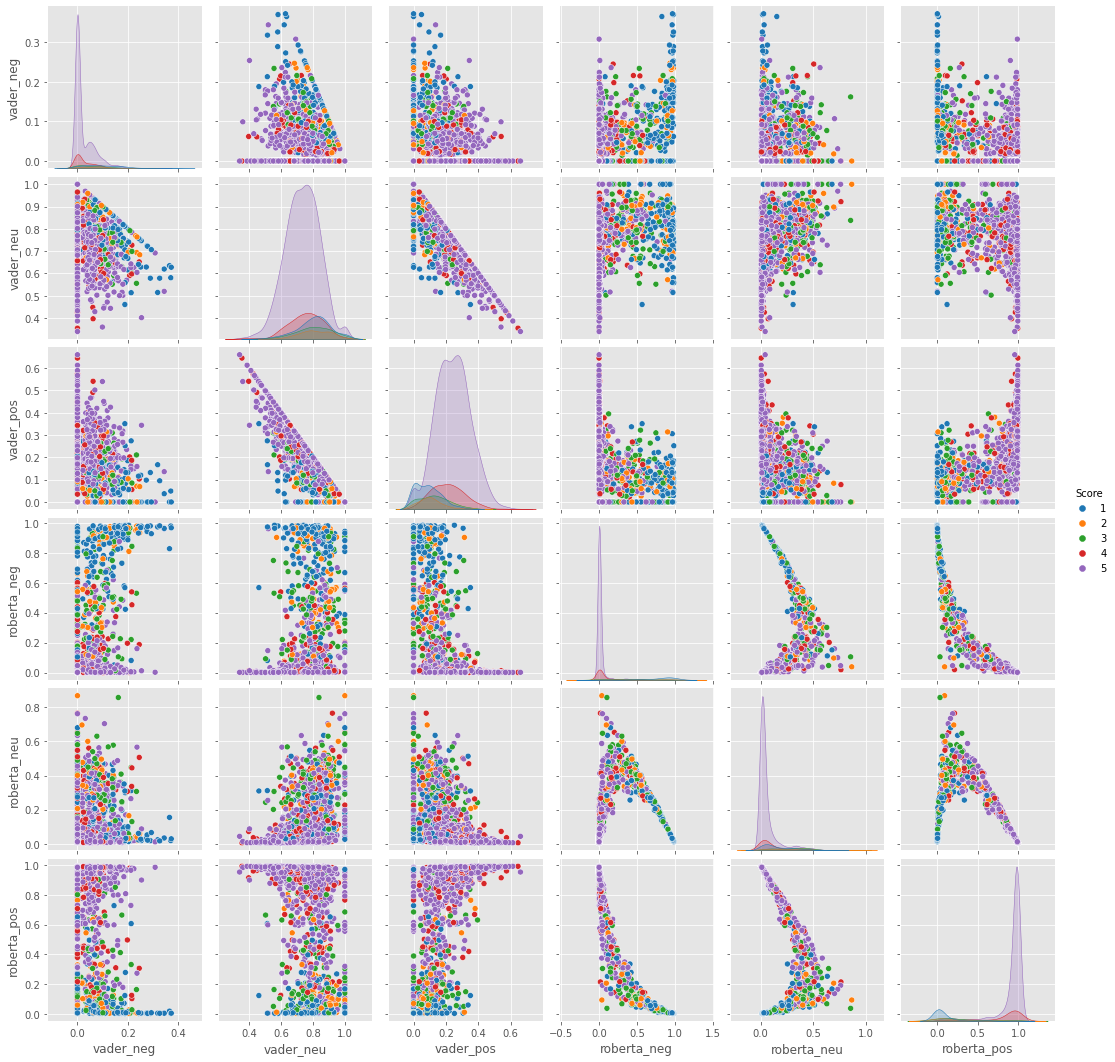

In [78]:
sns.pairplot(data=results_df, vars=['vader_neg', 'vader_neu', 'vader_pos','roberta_neg', 
                                   'roberta_neu', 'roberta_pos' ],
             hue='Score',
             palette='tab10')

In [79]:
results_df.query('Score==1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'

In [80]:
results_df.query('Score==1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'It is a good thing the can is so small. The product is several cuts below Sunny Delight. Terrible!'

In [81]:
results_df.query('Score==5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [82]:
results_df.query('Score==5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'